## Galaxy Zoo

Using data science techniques to analyze galaxy zoo data. Characterize galaxies as elliptical vs spiral.

Data description reference: https://data.galaxyzoo.org/data/candels/gzc_table2_description.txt

#### Import the data:

-analyzing how much data, what data contains, etc.

-seperate data into columns you want to analyze

-split data on training/test data

In [1]:
import pandas as pd
df = pd.read_csv("gz_candels_table_2_main_release.csv")

In [3]:
df.head(10)

,ID,RA,Dec,num_classifications,num_classifications_weighted,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t00_smooth_or_featured_a2_artifact_frac,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,...,t16_merging_tidal_debris_a3_neither_weighted_frac,t16_merging_tidal_debris_count,t16_merging_tidal_debris_weight,measured_corr,clean_smooth,clean_featured,clean_clumpy,clean_edge_on,clean_spiral,smooth_disk
0,COS_1,150.05682,2.173421,38.0,38.320458,0.026316,0.078947,0.894737,0.000883,0.059558,...,0.941489,4.0,3.186442,False,False,False,False,False,False,False
1,COS_10,150.05686,2.174979,39.0,38.169358,0.128205,0.025641,0.846154,0.137607,0.041204,...,0.819501,6.0,5.540188,False,False,False,False,False,False,False
2,COS_1000,150.08497,2.191447,76.0,73.932310,0.644737,0.250000,0.105263,0.714415,0.268447,...,0.913110,68.0,69.052986,False,False,False,False,False,False,False
3,COS_10000,150.08217,2.299318,39.0,37.427298,0.512821,0.051282,0.435897,0.727801,0.108449,...,0.958672,22.0,24.196523,False,False,False,False,False,False,False
4,COS_10002,150.20334,2.299440,36.0,34.376101,0.444444,0.083333,0.472222,0.702102,0.082279,...,0.871763,19.0,18.077062,False,False,False,False,False,False,False
5,COS_10004,150.06645,2.299418,40.0,35.271465,0.350000,0.050000,0.600000,0.454243,0.046038,...,0.729367,16.0,15.081565,False,False,False,False,False,False,False
6,COS_10005,150.18800,2.298331,38.0,36.774732,0.657895,0.131579,0.210526,0.752343,0.191280,...,0.678551,30.0,29.444238,False,False,False,False,False,False,False
7,COS_10006,150.13602,2.298921,74.0,67.061451,0.459459,0.283784,0.256757,0.538340,0.374873,...,0.408652,55.0,53.525583,False,False,False,False,False,False,False
8,COS_10007,150.19403,2.299470,38.0,35.108332,0.473684,0.157895,0.368421,0.619871,0.155235,...,0.870106,24.0,23.095752,False,False,False,False,False,False,False
9,COS_10008,150.13625,2.299512,39.0,36.307816,0.538462,0.102564,0.358974,0.724913,0.142772,...,0.845573,25.0,25.902273,False,False,False,False,False,False,True


In [4]:
N = len(df)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 49555 samles.


In [6]:
cols = list(df)
print('Data contains {} columns'.format(len(cols)))
list(df)

Data contains 146 columns


['ID',
 'RA',
 'Dec',
 'num_classifications',
 'num_classifications_weighted',
 't00_smooth_or_featured_a0_smooth_frac',
 't00_smooth_or_featured_a1_features_frac',
 't00_smooth_or_featured_a2_artifact_frac',
 't00_smooth_or_featured_a0_smooth_weighted_frac',
 't00_smooth_or_featured_a1_features_weighted_frac',
 't00_smooth_or_featured_a2_artifact_weighted_frac',
 't00_smooth_or_featured_count',
 't00_smooth_or_featured_weight',
 't01_how_rounded_a0_completely_frac',
 't01_how_rounded_a1_inbetween_frac',
 't01_how_rounded_a2_cigarshaped_frac',
 't01_how_rounded_a0_completely_weighted_frac',
 't01_how_rounded_a1_inbetween_weighted_frac',
 't01_how_rounded_a2_cigarshaped_weighted_frac',
 't01_how_rounded_count',
 't01_how_rounded_weight',
 't02_clumpy_appearance_a0_yes_frac',
 't02_clumpy_appearance_a1_no_frac',
 't02_clumpy_appearance_a0_yes_weighted_frac',
 't02_clumpy_appearance_a1_no_weighted_frac',
 't02_clumpy_appearance_count',
 't02_clumpy_appearance_weight',
 't03_how_many_clump

In [7]:
N = df.shape[0]
P = df.shape[1]

print('Data has {} rows, {} columns'.format(N, P))

Data has 49555 rows, 146 columns


In [8]:
df.dtypes

ID                                                         object
RA                                                        float64
Dec                                                       float64
num_classifications                                       float64
num_classifications_weighted                              float64
t00_smooth_or_featured_a0_smooth_frac                     float64
t00_smooth_or_featured_a1_features_frac                   float64
t00_smooth_or_featured_a2_artifact_frac                   float64
t00_smooth_or_featured_a0_smooth_weighted_frac            float64
t00_smooth_or_featured_a1_features_weighted_frac          float64
t00_smooth_or_featured_a2_artifact_weighted_frac          float64
t00_smooth_or_featured_count                              float64
t00_smooth_or_featured_weight                             float64
t01_how_rounded_a0_completely_frac                        float64
t01_how_rounded_a1_inbetween_frac                         float64
t01_how_ro

In [9]:
df[0:5]

,ID,RA,Dec,num_classifications,num_classifications_weighted,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t00_smooth_or_featured_a2_artifact_frac,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,...,t16_merging_tidal_debris_a3_neither_weighted_frac,t16_merging_tidal_debris_count,t16_merging_tidal_debris_weight,measured_corr,clean_smooth,clean_featured,clean_clumpy,clean_edge_on,clean_spiral,smooth_disk
0,COS_1,150.05682,2.173421,38.0,38.320458,0.026316,0.078947,0.894737,0.000883,0.059558,...,0.941489,4.0,3.186442,False,False,False,False,False,False,False
1,COS_10,150.05686,2.174979,39.0,38.169358,0.128205,0.025641,0.846154,0.137607,0.041204,...,0.819501,6.0,5.540188,False,False,False,False,False,False,False
2,COS_1000,150.08497,2.191447,76.0,73.932310,0.644737,0.250000,0.105263,0.714415,0.268447,...,0.913110,68.0,69.052986,False,False,False,False,False,False,False
3,COS_10000,150.08217,2.299318,39.0,37.427298,0.512821,0.051282,0.435897,0.727801,0.108449,...,0.958672,22.0,24.196523,False,False,False,False,False,False,False
4,COS_10002,150.20334,2.299440,36.0,34.376101,0.444444,0.083333,0.472222,0.702102,0.082279,...,0.871763,19.0,18.077062,False,False,False,False,False,False,False


In [10]:
data = df[['t00_smooth_or_featured_a0_smooth_frac', 't00_smooth_or_featured_a1_features_frac', 
           't01_how_rounded_a0_completely_frac', 't01_how_rounded_a2_cigarshaped_frac', 
           't02_clumpy_appearance_a0_yes_frac', 't02_clumpy_appearance_a1_no_frac', 
           't12_spiral_pattern_a0_yes_frac', 't12_spiral_pattern_a1_no_frac']]
data.head(5)

,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t01_how_rounded_a0_completely_frac,t01_how_rounded_a2_cigarshaped_frac,t02_clumpy_appearance_a0_yes_frac,t02_clumpy_appearance_a1_no_frac,t12_spiral_pattern_a0_yes_frac,t12_spiral_pattern_a1_no_frac
0,0.026316,0.078947,0.0000,0.000000,1.000000,0.000000,0.0,0.0
1,0.128205,0.025641,0.6000,0.000000,0.000000,1.000000,0.0,0.0
2,0.644737,0.250000,0.0000,0.122449,0.263158,0.736842,0.0,1.0
3,0.512821,0.051282,0.8000,0.000000,0.500000,0.500000,0.0,1.0
4,0.444444,0.083333,0.5625,0.000000,0.333333,0.666667,0.5,0.5


In [11]:
data_weighted = df[['t00_smooth_or_featured_a0_smooth_weighted_frac', 't00_smooth_or_featured_a1_features_weighted_frac', 
           't01_how_rounded_a0_completely_weighted_frac', 't01_how_rounded_a2_cigarshaped_weighted_frac', 
           't02_clumpy_appearance_a0_yes_weighted_frac', 't02_clumpy_appearance_a1_no_weighted_frac', 
           't12_spiral_pattern_a0_yes_weighted_frac', 't12_spiral_pattern_a1_no_weighted_frac']]
data_weighted.head(5)

,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,t01_how_rounded_a0_completely_weighted_frac,t01_how_rounded_a2_cigarshaped_weighted_frac,t02_clumpy_appearance_a0_yes_weighted_frac,t02_clumpy_appearance_a1_no_weighted_frac,t12_spiral_pattern_a0_yes_weighted_frac,t12_spiral_pattern_a1_no_weighted_frac
0,0.000883,0.059558,0.000000,0.000000,1.000000,0.000000,0.0,0.0
1,0.137607,0.041204,0.559490,0.000000,0.000000,1.000000,0.0,0.0
2,0.714415,0.268447,0.000000,0.117855,0.249677,0.750323,0.0,1.0
3,0.727801,0.108449,0.819792,0.000000,0.500000,0.500000,0.0,1.0
4,0.702102,0.082279,0.555807,0.000000,0.137242,0.862758,0.5,0.5


In [12]:
#training data
train = df.head(39644)
train_frac = data.head(39644)
train_weighted = data_weighted.head(39644)

In [13]:
#testing data
test = df.head(9911)
test_frac = data.head(9911)
test_weighted = data_weighted.head(9911)

### Explore the data

-graphs based on number of votes/classification

<function matplotlib.pyplot.show(*args, **kw)>

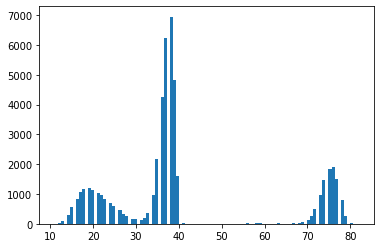

In [16]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(df['num_classifications'], bins=100)
plt.show
#as seen below, most galaxies have ~18, 37, or 76 classifications

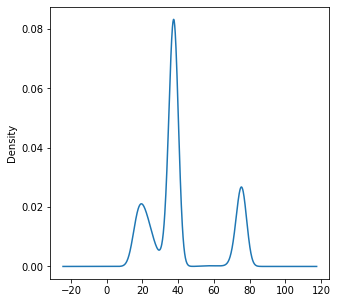

In [17]:
df['num_classifications'].plot(kind="density", figsize=(5,5))

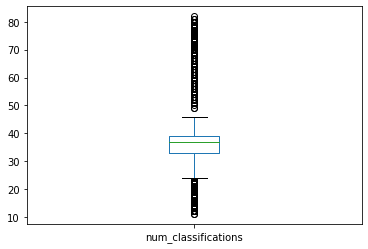

In [18]:
df['num_classifications'].plot(kind="box")

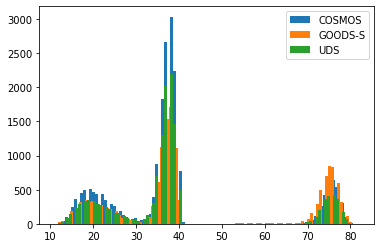

In [19]:
plt.hist(df[df['ID'].str.contains('COS')]['num_classifications'], label='COSMOS', bins=100)
plt.hist(df[df['ID'].str.contains('GDS')]['num_classifications'], label='GOODS-S', bins=100)
plt.hist(df[df['ID'].str.contains('UDS')]['num_classifications'], label='UDS', bins=100)
plt.legend()
plt.show()

### Use a distance metric and an unsupervised algorithm to cluster the data

#### Anomoly detection using DBSCAN?

-sklearn implementation

Levenshtein information

Help with unsupervised learning: https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/